In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import xarray as xr                                                                  
import numpy as np                                                                   
import matplotlib.pyplot as plt                                                      
import sys                                                                           
import os                                                                            
import glob                                                                          
import pyicon as pyic 

In [59]:
# Initialize default parameters                                                      
# -----------------------------                                                      
exec(open('../shallowpy_defaults.py').read()) 

In [124]:
# Modify default parameters
# -------------------------
# run = __file__.split('/')[-1][:-3]
run = 'rossby_wave'
path_data = f'/Users/nbruegge/work/movies/shallow_py/{run}/'                         
                                                                                     
nx = 200                                                                             
ny = 50                                                                             
nt = 100_000                                                                            
#nt = 500                                                                            
#nt = 1                                                                              
                                                                                     
picture_frequency = 0                                                                
output_frequency = 20                                                                
diagnostic_frequency = output_frequency                                              
                                                                                     
dx = 5e3                                                                            
dy = dx                                                                              
#dt = 360.                                                                           
                                                                                     
# grav = 9.81                                                                         
grav = 0.02                                                                          
rho = np.array([1024.])                                                              
nz = rho.size                                                                        
                                                                                     
H0 = 500.                                                                            
cph = np.sqrt(grav*H0)
dist = dt*nt * cph
dt  = 0.1*dx/np.sqrt(grav*H0)
#dt = 360.

nspx = 1
nspy = 1
epsab = 0.01

kh = 1000.
Ah = kh

f0 = 1e-4
beta = 1e-11 * 10.

do_momentum_advection = False
do_momentum_diffusion = False
do_momentum_coriolis_exp = False
do_momentum_coriolis_imp = True
do_momentum_pressure_gradient = True
do_momentum_forcing = True
do_height_diffusion = False
do_height_forcing = True

In [125]:
dx/1e3, Lx/1e3

(5.0, 990.0)

In [126]:
nt*dt/86400

183.0021794078923

In [127]:
Lr = np.sqrt(grav*H0)/f0
kx = 2*np.pi/100e3
ky = 0.
om = -beta*kx/(kx**2+ky**2 + Lr**(-2))
cx = om/kx
cy = om/ky
Tper = 2.*np.pi/om
print(f'Lr = {Lr/1e3:.1f}km, Tper = {Tper/86400.}, cx = {cx}, cy = {cy}')

Lr = 31.6km, Tper = -57.26668704208035, cx = -0.020210832286437812, cy = -inf


<ipython-input-127-a60ef6f2f16d>:6: RuntimeWarning: divide by zero encountered in double_scalars
  cy = om/ky


In [128]:
# Initialize the grid and initial conditions
# ------------------------------------------
exec(open('../shallowpy_grid_setup.py').read())

In [129]:
# Modify initial conditions
# -------------------------
# eta0[0,:,:] = 0.1*np.exp(-((Xt-0.5*Lx)**2+(Yt-0.5*Ly)**2)/(1.e-3*(Lx**2+Ly**2)))
# eta0[0,:,:] = 0.1*np.cos(2*np.pi*Xt/Lx * 5)
eta0[0,:,:] = 0.
eta0[1,:,:] = -H0

ho0 = eta0[:-1,:,:]-eta0[1:,:,:]

# maskt0[:,0,:] = 0.
# maskt0[:,-1,:] = 0.
# maskt0[:,:,0] = 0.
# maskt0[:,:,-1] = 0.

ix = np.array([nx//2])
iy = np.array([1*ny//4])

In [130]:
grav

0.02

In [139]:
hamp0 = 0.1*np.exp(-((Xt-0.5*Lx)**2+(Yt-0.5*Ly)**2)/(Lr**2))
hamp = np.zeros((nz,ny+2*nspy,nx+2*nspx))
hamp[:,nspy:-nspy,nspx:-nspx] = hamp0[np.newaxis,:,:]
uamp = np.zeros((nz,ny+2*nspy,nx+2*nspx))
uamp[:,1:-1,:] = -grav/f0*(hamp[:,2:,:]-hamp[:,:-2,:])/(2*dy)
vamp = np.zeros((nz,ny+2*nspy,nx+2*nspx))
vamp[:,:,1:-1] =  grav/f0*(hamp[:,:,2:]-hamp[:,:,:-2])/(2*dx)
# Tforc = 86400.
Tforc = Tper

def ho_forcing(time):
    Tho_for = hamp * np.sin(2.*np.pi*time / Tforc) / dt
    return Tho_for

def uo_forcing(time):
    Tuo_for = uamp * np.sin(2.*np.pi*time / Tforc) / dt
    return Tho_for

def vo_forcing(time):
    Tvo_for = vamp * np.sin(2.*np.pi*time / Tforc) / dt
    return Tho_for

In [140]:
Tho_for = ho_forcing(10.)
Tho_for.shape

(1, 52, 202)

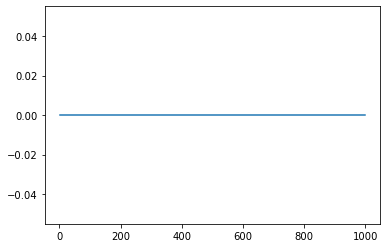

In [141]:
fig = plt.figure()
ax = plt.axes()

ax.plot(xt/1e3, eta0[0,10,:])

In [142]:
# Run the model
# -------------
exec(open('../shallowpy_main.py').read())

ll = 0/100000, ho.sum = 5252000.0, ke.sum = 0.0, cflu = 0.0, cflv = 0.0
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1204.nc
nnp = 1204, Total run time: 0.0min, done at 2021-11-10 13:08:37.775000
ll = 20/100000, ho.sum = 5251999.445697602, ke.sum = 0.0009748087076269986, cflu = 1.8757817884065897e-110, cflv = 6.1646181907593035e-12
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1205.nc
nnp = 1205, Total run time: 0.0min, done at 2021-11-10 13:08:38.325000
ll = 40/100000, ho.sum = 5251997.880962634, ke.sum = 0.014203204784948575, cflu = 1.5241656016944408e-12, cflv = 6.990197250669435e-07
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1206.nc
nnp = 1206, Total run time: 0.0min, done at 2021-11-10 13:08:38.880000
ll = 60/100000, ho.sum = 5251995.3077226365, ke.sum = 0.06206373649044329, cflu = 1.2848312603983632e-09, cflv = 3.064029908534458e-05
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1207.nc
nnp = 1

ll = 620/100000, ho.sum = 5251486.627394749, ke.sum = 75.87379712243421, cflu = 0.012738797853481412, cflv = 0.016973305276378334
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1235.nc
nnp = 1235, Total run time: 0.3min, done at 2021-11-10 13:08:55.510000
ll = 640/100000, ho.sum = 5251460.031159578, ke.sum = 84.8759273014445, cflu = 0.013614524820718923, cflv = 0.01793425579118553
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1236.nc
nnp = 1236, Total run time: 0.3min, done at 2021-11-10 13:08:56.080000
ll = 660/100000, ho.sum = 5251427.622490311, ke.sum = 94.59546425790735, cflu = 0.014507673194358141, cflv = 0.01886283536709549
Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_1237.nc
nnp = 1237, Total run time: 0.3min, done at 2021-11-10 13:08:56.645000
ll = 680/100000, ho.sum = 5251388.674026834, ke.sum = 105.13795354286368, cflu = 0.01541048506663827, cflv = 0.019786524549705847
Save file /Users/nbruegge/work/movies/shallow

KeyboardInterrupt: 

In [78]:
# Do post-processing
# ------------------
exec(open('../pp_main.py').read())

In [15]:
# Combine all netcdf files
# ------------------------
#if output_frequency>0:
if True:
  mfdset_kwargs = dict(combine='nested', concat_dim='time',
                       data_vars='minimal', coords='minimal', compat='override', join='override',
                      )
  ds = xr.open_mfdataset(f'{path_data}/{file_prfx}_????.nc', **mfdset_kwargs)
  fpath = f'{path_data}/{file_prfx}_combined.nc'
  print(f'Save file {fpath}')
  ds['ho'] = ds.ho.where(masktp==1)
  ds['uo'] = ds.ho.where(maskup==1)
  ds['vo'] = ds.ho.where(maskvp==1)
  ds = ds.compute()
  ds['ho'][0,:,:,:] = np.nan
  ds.to_netcdf(fpath)

Save file /Users/nbruegge/work/movies/shallow_py/rossby_wave//test_combined.nc


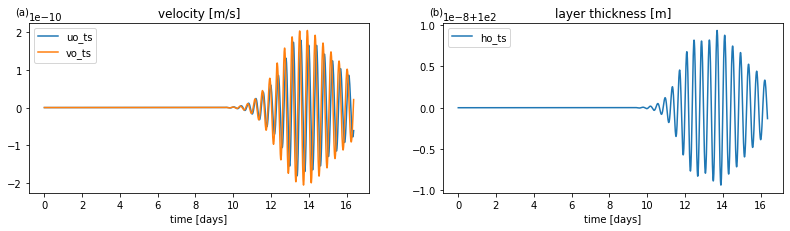

In [11]:
exec(open('../plot_timeseries.py').read())

/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hm = ax.pcolormesh(x, y,
/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hm = ax.pcolormesh(x, y,
/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Ei

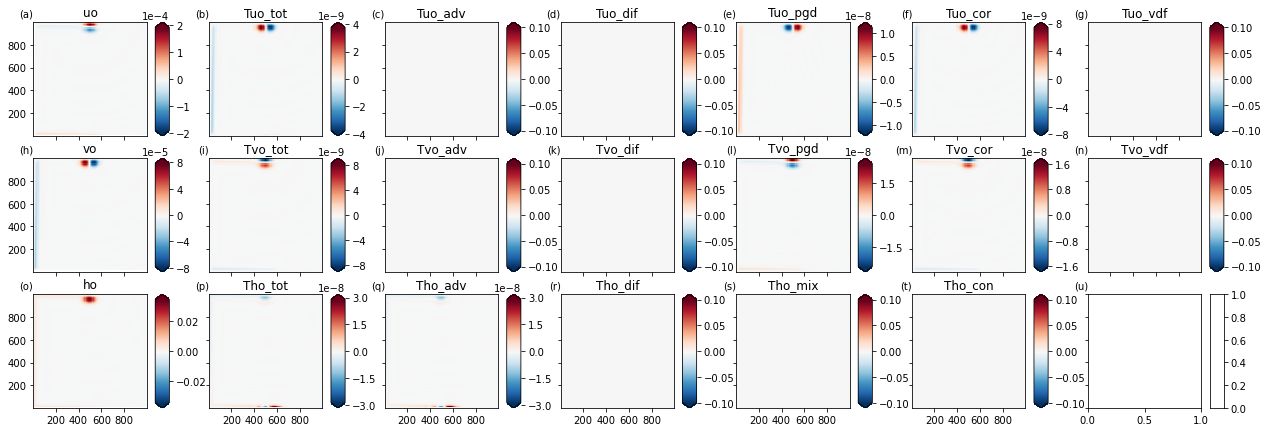

In [12]:
exec(open('../plot_fields_tendencies.py').read())

/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hm = ax.pcolormesh(x, y,
/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hm = ax.pcolormesh(x, y,
/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Ei

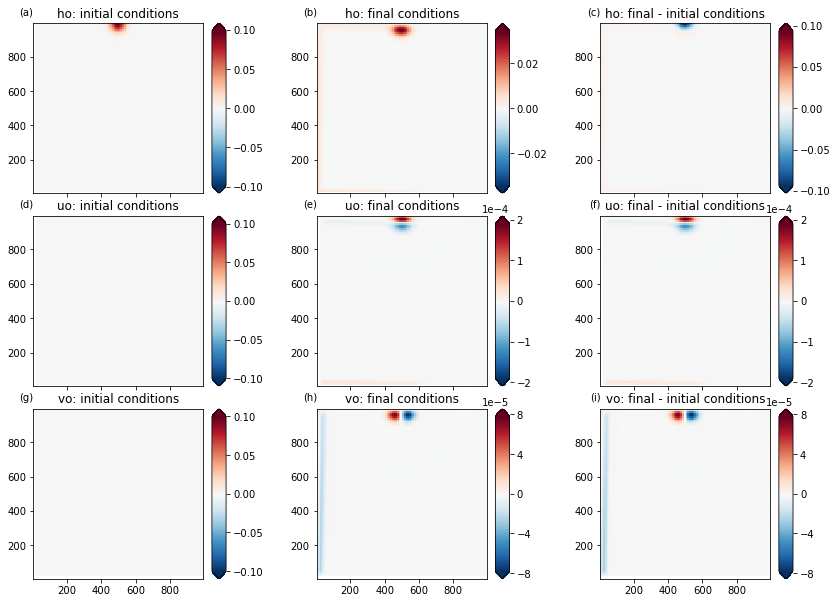

In [14]:
exec(open('./plot_final_initial.py').read())

/Users/nbruegge/Promotion/src/pyicon/pyicon/pyicon_plotting.py:524: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hm = ax.pcolormesh(x, y,


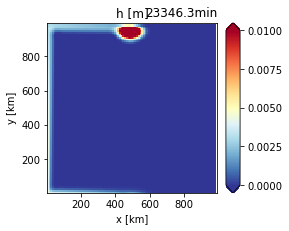

In [18]:
fpath = '/Users/nbruegge/work/movies/shallow_py/examp_kelvin_wave//test_????.nc'
ds = xr.open_mfdataset(fpath, **mfdset_kwargs)
ds = ds.compute()

H0 = 100.

var = 'ho'
iz = 0

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=1., fig_size_fac=1.5, axlab_kw=None)
ii=-1

ll=10

ii+=1; ax=hca[ii]; cax=hcb[ii]
data = ds['ho'][ll,iz,:,:]
clim = [0,1e-2]
hm = pyic.shade(ds.xt/1e3, ds.yt/1e3, data-H0, ax=ax, cax=cax, clim=clim)
ax.set_title('h [m]')
ht = ax.set_title(f'{ds.time[ll].data/60.:.1f}min', loc='right')

#pyic.shade(ds.xt/1e3, ds.yt/1e3, (ds.ho[10,0,:,:]-H0).transpose(), ax=ax, cax=cax, clim='sym')

for ax in hca:
  ax.set_xlabel('x [km]')
  ax.set_ylabel('y [km]')

for ll in range(ds.time.size):
  data = ds[var][ll,iz,:,:].data - H0
  hm[0].set_array(data[1:,1:].flatten())
  ht.set_text(f'{ds.time[ll].data/60.:.1f}min')
  fpath_fig = f'/Users/nbruegge/work/movies/shallow_py/examp_kelvin_wave/anim_01/kelvin_wave_{ll:04d}.jpg'
  print(f'Saving figure {fpath_fig}', end='\r')
  plt.savefig(fpath_fig, dpi=250)

In [21]:
a = './'

In [22]:
!ls a

ls: a: No such file or directory


In [23]:
from IPython.display import Video

In [32]:
from IPython.display import HTML

In [33]:
!ln -sf "~/work/movies/shallow_py/examp_kelvin_wave/anim_01/kelvin_wave.mp4" .

In [80]:
Video("/Users/nbruegge/work/movies/shallow_py/examp_kelvin_wave/anim_01/OUT.mp4", embed=True)
# Video("/Users/nbruegge/work/movies/shallow_py/examp_kelvin_wave/anim_01/kelvin_wave.mp4", embed=True)